# Thera Bank Personal Loan Campaign Project

# Objective
The classification goal is to predict the likelihood of a liability customer buying personal loans.

# Import Libraries

Import the datasets and libraries, check datatype, statistical summary,shape,null values or incorrect imputation.

In [165]:
import warnings
warnings.filterwarnings('ignore')

In [166]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np
import os,sys
from scipy import stats

# calculate accuracy measures and confusion matrix
from sklearn import metrics

# Import Dataset

In [167]:
df = pd.read_csv(r'C:\Users\zehra.hussain\DataScience\Course\Supervised\data\Bank_Personal_Loan_Modelling.csv') # Read the data.

In [168]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [169]:
df.shape

(5000, 14)

# Univariate Analysis

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [171]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


Experience is negative 
CCAvg has some zeros
Median Mortgage is zero

In [172]:
df.ID[df['Mortgage']==0].count()

3462

In [173]:
df.ID[df['CCAvg']==0].count()

106

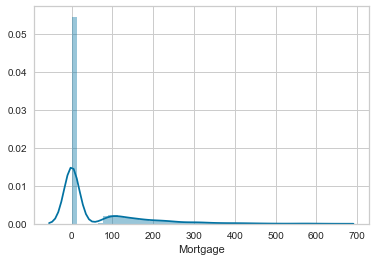

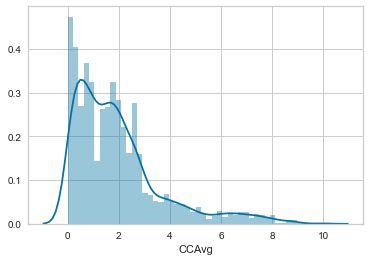

In [174]:
for i in ['Mortgage','CCAvg']:
    sns.distplot(df[i])
    plt.show()

In [175]:
df = df.drop('ID', axis =1 ) 
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [176]:
df["Experience"]= df["Experience"].abs()

In [177]:
df.isnull().sum()

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [178]:
df.nunique()

Age                    45
Experience             44
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

# Bivariate Analysis

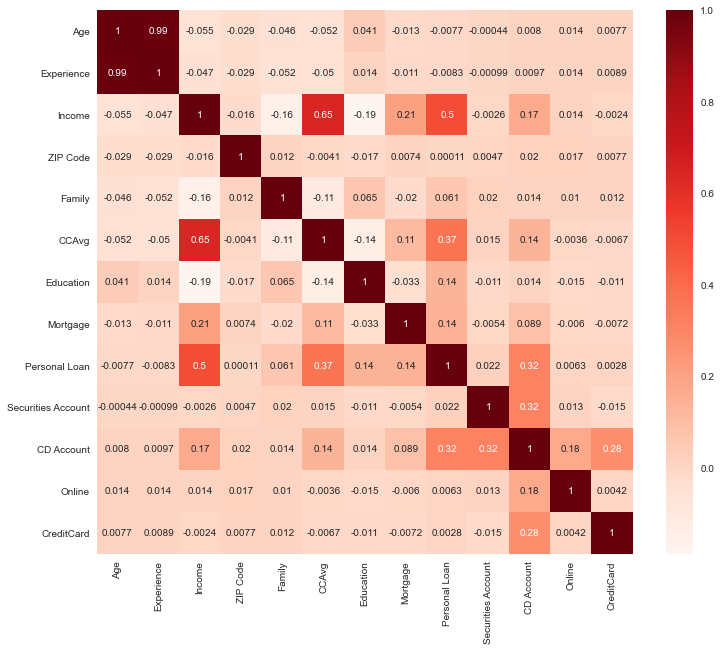

In [179]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [180]:
#Convert X & Y variable to a categorical variable wherever relevant
df['Family'] = df['Family'].astype('category')
df['Education'] = df['Education'].astype('category')
df['Personal Loan'] = df['Personal Loan'].astype('category')
df['Securities Account'] = df['Securities Account'].astype('category')
df['CD Account'] = df['CD Account'].astype('category')
df['Online'] = df['Online'].astype('category')
df['CreditCard'] = df['CreditCard'].astype('category')
df['ZIP Code'] = df['ZIP Code'].astype('category')


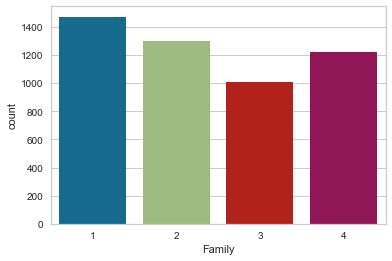

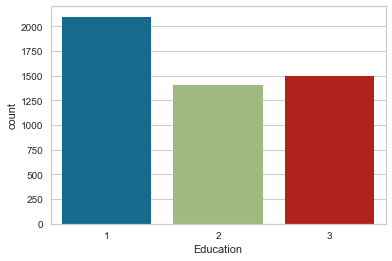

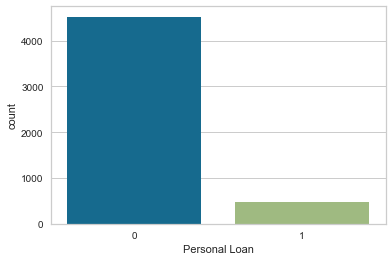

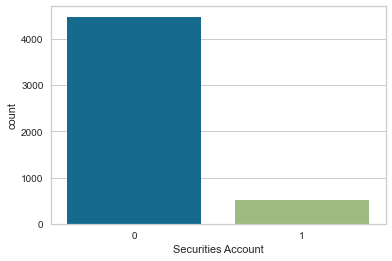

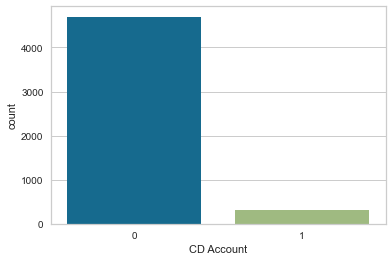

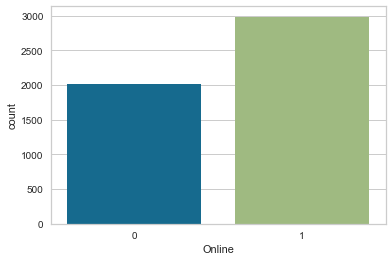

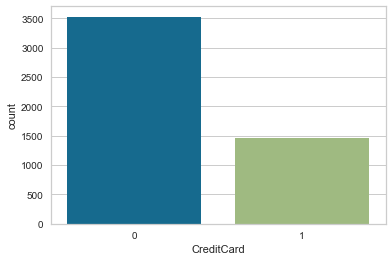

In [181]:
for i in list(['Family', 'Education', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard']):  
     sns.countplot(df[i])
     plt.show()

In [182]:
for i in list(['Family', 'Education', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard']):  
    print(df[i].value_counts(normalize=True))
    print()

1    0.2944
2    0.2592
4    0.2444
3    0.2020
Name: Family, dtype: float64

1    0.4192
3    0.3002
2    0.2806
Name: Education, dtype: float64

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

0    0.8956
1    0.1044
Name: Securities Account, dtype: float64

0    0.9396
1    0.0604
Name: CD Account, dtype: float64

1    0.5968
0    0.4032
Name: Online, dtype: float64

0    0.706
1    0.294
Name: CreditCard, dtype: float64



In [183]:
df.groupby(["Personal Loan"]).mean()

,Age,Experience,Income,CCAvg,Mortgage
Personal Loan,,,,,
0,45.367257,20.165487,66.237389,1.729009,51.789381
1,45.066667,19.843750,144.745833,3.905354,100.845833


In [184]:
df.groupby(["Personal Loan"]).median()

,Age,Experience,Income,CCAvg,Mortgage
Personal Loan,,,,,
0,45.0,20.0,59.0,1.4,0.0
1,45.0,20.0,142.5,3.8,0.0


In [185]:
pd.crosstab(df['Personal Loan'],df['Family'],normalize='index')

Family,1,2,3,4
Personal Loan,,,,
0,0.301991,0.263274,0.194027,0.240708
1,0.222917,0.220833,0.277083,0.279167


In [186]:
pd.crosstab(df['Personal Loan'],df['Securities Account'],normalize='index')

Securities Account,0,1
Personal Loan,,
0,0.897788,0.102212
1,0.875000,0.125000


In [187]:
pd.crosstab(df['Personal Loan'],df['CD Account'],normalize='index')

CD Account,0,1
Personal Loan,,
0,0.964159,0.035841
1,0.708333,0.291667


In [188]:
pd.crosstab(df['Personal Loan'],df['Online'],normalize='index')

Online,0,1
Personal Loan,,
0,0.404204,0.595796
1,0.393750,0.606250


In [189]:
pd.crosstab(df['Personal Loan'],df['CreditCard'],normalize='index')

CreditCard,0,1
Personal Loan,,
0,0.706416,0.293584
1,0.702083,0.297917


# 3.Split  data into training and test 

In [190]:
## Define X and Y variables
X = df.drop('Personal Loan', axis=1)
Y = df[['Personal Loan']]

In [191]:
#Convert categorical vriables to dummy variables
X = pd.get_dummies(X, drop_first=True)

In [192]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=1)

# 4.Use  Logistic  Regression model 

In [193]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=50)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=50, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [194]:
y_predict = logreg.predict(X_test)

In [195]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.9682857142857143

Testing accuracy 0.948

Confusion Matrix


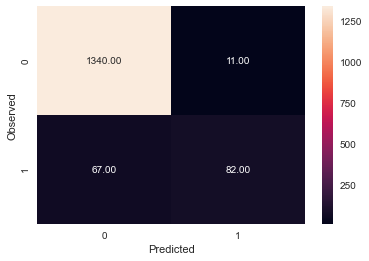

None

Recall: 0.5503355704697986

Precision: 0.8817204301075269

F1 Score: 0.6776859504132231

Roc Auc Score: 0.7710967267596956


In [197]:
print("Trainig accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

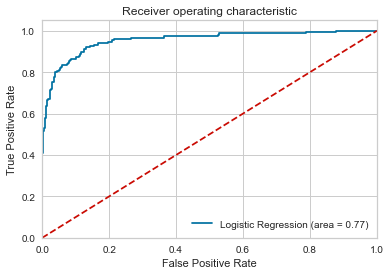

In [198]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Improving Model Performance

We can tweak the parameters such as "C" and "penalty" and "solver" to optimize the model for the measure we most care about.

I have created two models, based on the Bank's objective we can choose one over the other. 

The first model (Model 1) optimizes for precision. Precision is a metric that quantifies the number of correct positive predictions made. So this model optimizes the number of customers incorrectly predicted as "this customer will get a loan". If the Bank's objective is to minimize risk and wants to only make the offer to customers who are truly eligible and are not risky in that case the Bank should go for this model. 
This model correctly predicts 90 customers who will get the loan out of 149 total loan customers. 59 customers will be missed opportunity but the model has very low false positives. The model only wrongly lablels 12 customers as potential loan customers but they actualy do not end up getting the loan.  

In [199]:
# Checking Parameters of logistic regression
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 50,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

# Model 1 - Optimized for Precision

Best Penalty: l1

Best C: 1.0

Trainig accuracy 0.9642857142857143

Testing accuracy 0.9526666666666667

Confusion Matrix


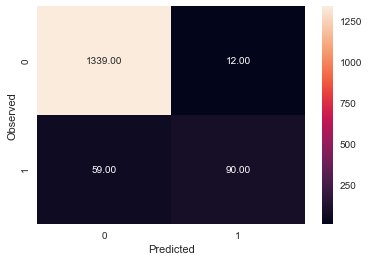

None
Recall: 0.6040268456375839

Precision: 0.8823529411764706

F1 Score: 0.7171314741035856

Roc Auc Score: 0.7975722681185698


In [200]:
from sklearn.model_selection import GridSearchCV

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# Create grid search using 5-fold cross validation
clf = GridSearchCV(logreg, hyperparameters, cv=5, verbose=0)

# Fit grid search
best_model = clf.fit(X_train, y_train)
y_predict = best_model.predict(X_test)

# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print()
print('Best C:', best_model.best_estimator_.get_params()['C'])
print()
print("Trainig accuracy",best_model.score(X_train,y_train))  
print()
print("Testing accuracy",best_model.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

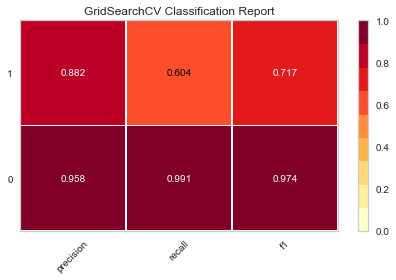

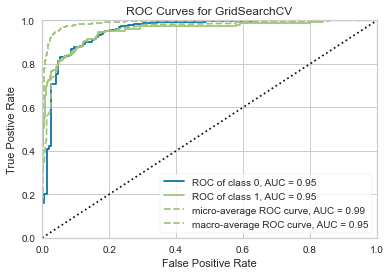

In [202]:
from yellowbrick.classifier import ClassificationReport, ROCAUC
# Visualize model performance with yellowbrick library
viz = ClassificationReport(best_model)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(best_model)
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()



# Model 2 - Optimized for Recall

The second model (Model 2) optimizes for recall. Recall is a metric that quantifies the number of correct positive predictions made out of all positive predictions that could have been made. So this model optimizes the number of customers correctly predicted as "this customer will get a loan". If the Bank's objective is to maximize conversion and wants to convert the highest number of liability customers and is willing to take more risks, in that case the Bank should go for this model. 
This model correctly predicts 129 customers who will get the loan out of 149 total loan customers. Only 20 customers will be missed opportunity although the model wrongly lablels 109 customers as potential loan customers but they actualy do not end up getting the loan. This is a risky and more aggresive option for the Bank.


Trainig accuracy 0.9182857142857143

Testing accuracy 0.914

Confusion Matrix


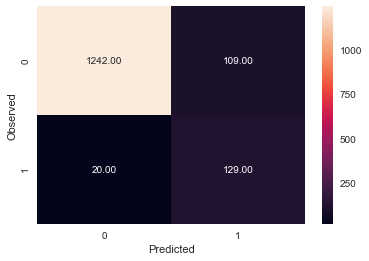

None

Recall: 0.8657718120805369

Precision: 0.542016806722689

F1 Score: 0.6666666666666665

Roc Auc Score: 0.8925454175132514


In [203]:
model_2 = LogisticRegression(random_state=50,penalty='l2', solver='lbfgs', class_weight='balanced',C=1) 
model_2.fit(X_train, y_train)
y_predict = model_2.predict(X_test)
print("Trainig accuracy",model_2.score(X_train,y_train))  
print()
print("Testing accuracy",model_2.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))


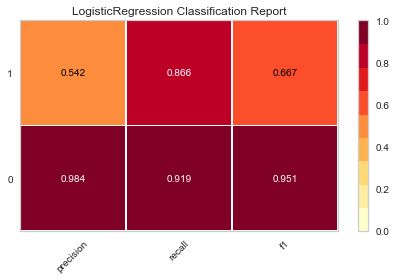

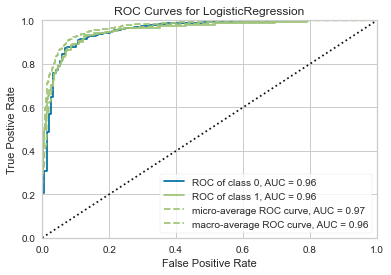

In [204]:
from yellowbrick.classifier import ClassificationReport, ROCAUC
# Visualize model performance with yellowbrick library
viz = ClassificationReport(model_2)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(model_2)
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

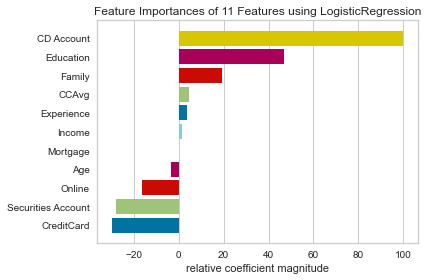

In [217]:
from yellowbrick.model_selection import FeatureImportances
from sklearn.model_selection import train_test_split

X2 = df.drop('Personal Loan', axis=1)
X2 = X2.drop('ZIP Code', axis=1)
Y2 = df[['Personal Loan']]

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size=0.30,random_state=1)

model_3 = LogisticRegression(random_state=50,penalty='l1', solver='liblinear',C=1) 
model_3.fit(X2_train, y2_train)
y2_predict = model_3.predict(X2_test)


viz = FeatureImportances(model_3)
viz.fit(X2_train, y2_train)
viz.show()



# 6.Business Insights

Confusion matrix Interpretation 

Recap
This case is about a bank (TheraBank) whose management wants to explore ways of converting its  liability  customers  to  personal  loan  customers  (while  retaining  them  as  depositors).  A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over  9% success.  This  has  encouraged  the  retail  marketing  department  to  devise  campaigns with better target marketing to increase the success ratio with a minimal budget.


Objective 
Better target marketing to increase conversion with a minimal budget while retaining customers as depositors.


Analysis

Important Features 
CD Account, Education, Family, Credit Card and Securities Account were the most important features.

Income, Credit Card and CD Account were also highly correlated features to Personal laons.

Confustion Matrix Interpretation
True Positive (observed=1,predicted=1):
      Predicted that that the customer would get a personal loan and actually ends up getting a loan

False Positive (observed=0,predicted=1):
      Predicted that customer will get a loan but will end up getting a loan

True Negative (observed=0,predicted=0):
       Predicted that the customer will not get a loan and the customer actually does not get a loan

False Negative (observed=1,predicted=0):
       Predicted that the customer will will not get a loan but the customer actually ends up getting a loan

I came up with the following important KPIs based on the objective outliend in the case study
1) Conversion Rate
2) Precision 
3) F1 Score
4) Recall
5) Potentail risk 

Conversion Ratio : Customers correctly identified as potential loan customers / total customers 
Model 1 6% 
Model 2 9%

Precision : Customers correctly identified as potential loan customers / Total customers identified as potential loan customers 
Model 1 : 88%
Model 2 : 54%

F1 Score :   (2 * Precision * Recall) / (Precision + Recall)
Model 1 : 71%
Model 2 : 66%

Recall : Of the total loan custmers how much did the model capture 
Model 1 : 60%
Model 2 : 87%

Potentail Risk Consideration: Lets say average Personal loan amount per customer is $5,000. Based on this information total dollrs at risk for the two models would be :
Model 1 : $60,000 ($5,000 * 12)
Model 2 : $545,000 ($5,000 * 109)

Now lets say average income per loan is $500. So the amount that the Bank will make based on the two models is:
Model 1 : $45,000
Model 2 : $64,500

If you observe the risk return trade off model 1 is superior.

Conclusion
Since this is a highly imbalanced dataset. If we use F1 score model 1 is more superior. It is also less risky and had a decent conversion ratio of 6%.




In [221]:
import os

os.system('jupyter nbconvert --to html TheraBank Project_ZehraHussain.ipynb')

-1